# Delhi House Price Prediction

The aim of this project to predict the price of the houses in Delhi, in various localities, based on the data present in the dataset. The dataset is from Kaggle. The project aims to predicts the house price, by analysing the features such as area, number of bedrooms, locality and many more. The dataset has 1259 rows and 11 columns.

### Data Dictionary
| Column Name | Description |
| --- | --- |
| Area | Area of the house in square feet |
| BHK | Number of bedrooms |
| Bathroom | Number of bathrooms |
| Furnishing | Furnishing status |
| Locality | Locality of the house |
| Parking | Number of parking available|
| Price | Price of the house in INR |
| Status | property's status as in 'ready to move' or still under construction |
| Transaction | Its a new property or being re-sold |
| Type | Type of the property |
| Per_Sqft | Price per square feet |

In [356]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [357]:
# Loading the dataset
df = pd.read_csv('MagicBricks.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


## Data Preprocessing 1

In [358]:
# Checking the shape of the dataset
df.shape

(1259, 11)

In [359]:
# Checking for null/missing values
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

The dataset has five columns with missing values - Parking, Bathroom, Furnishing, Type and Per_Sqft. Finding value for Per_Sqft is quite easy. We have to divide Price by Area to get Per_Sqft. To find the missing values in Parking, Bathroom, Furnishing and Type, I will replace the missing values with the mode of them.

In [360]:
# Replacing missing value in Per_Sqft
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [361]:
# Replacing missing values in Parking, Bathroom, Furnishing and Type
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

In [362]:
# Checking for missing values
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

Checking datatype of each column

In [363]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

Parking and Number of bathrooms, cam't be in float so, converting them into integer

In [364]:
# Type casting
df[['Parking', 'Bathroom']].astype('int64')

,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


Unique value count in each column

In [365]:
# Unique value count
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

Value count for each value in each variable

In [366]:
# Value count for each value
print(df['Area'].value_counts(),'\n', df['BHK'].value_counts(),'\n', df['Bathroom'].value_counts(),'\n', df['Parking'].value_counts(),'\n', df['Furnishing'].value_counts(),'\n', df['Status'].value_counts(),'\n', df['Transaction'].value_counts(),'\n', df['Type'].value_counts(),'\n', df['Per_Sqft'].value_counts())

Area
900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: count, Length: 315, dtype: int64 
 BHK
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: count, dtype: int64 
 Bathroom
2.0    553
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: count, dtype: int64 
 Parking
1.0      829
2.0      341
3.0       54
4.0       16
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: count, dtype: int64 
 Furnishing
Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: count, dtype: int64 
 Status
Ready_to_move    1184
Almost_ready       75
Name: count, dtype: int64 
 Transaction
Resale          781
New_Property    478
Name: count, dtype: int64 
 Type
Builder_Floor    666
Apartment        593
Name: count, dtype: int64 
 Per_Sqft
12500.000000    37
3524.000000     28
6667.000000     27
14818.000000    

#### Adding new area column in Sq Yards for better understanding of area

In [367]:
df['Area_Yards'] = df['Area']/9

### Grouping the House Locality

In [368]:
# Unique Localities
df['Locality'].unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

Since there are so many localities in the dataset, I have decided to take only top 10 localities and list the remaining localities as 'other' in the dataset. It will help in analysing the locality of the house in a better way.

In [369]:
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(grp_local)

In [370]:
df['Locality'].value_counts()

Locality
Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: count, dtype: int64

In [371]:
# Using Z - score to remove outliers
from scipy import stats
# Z score
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]

Descriptive Statistics

In [372]:
# Checking descriptive satistics of the data
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03,1189.000000,1189.000000
mean,1296.421567,2.735913,2.483600,1.410429,1.852459e+07,12629.785274,144.046841
std,750.284776,0.859232,0.952107,0.719913,1.772598e+07,8434.085021,83.364975
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000,3.111111
25%,800.000000,2.000000,2.000000,1.000000,5.510000e+06,6526.000000,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,1.350000e+07,10943.000000,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,2.490000e+07,16584.000000,177.777778
max,5220.000000,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


In [373]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,800.0,3,2.0,Semi-Furnished,Rohini Sector,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,750.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333
2,950.0,2,2.0,Furnished,Rohini Sector,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,105.555556
3,600.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,66.666667
4,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,72.222222
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0,144.444444
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0,150.000000
7,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0,72.222222
8,985.0,3,3.0,Unfurnished,Rohini Sector,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0,109.444444
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0,144.444444


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the data and try to undersatnd the data. I will begin by looking at the distribution of data across the dataset, followed by visualizing the data to understand the relationship between the features and the target variable.

### Area of Houses

Text(0.5, 1.0, 'Area in Yards')

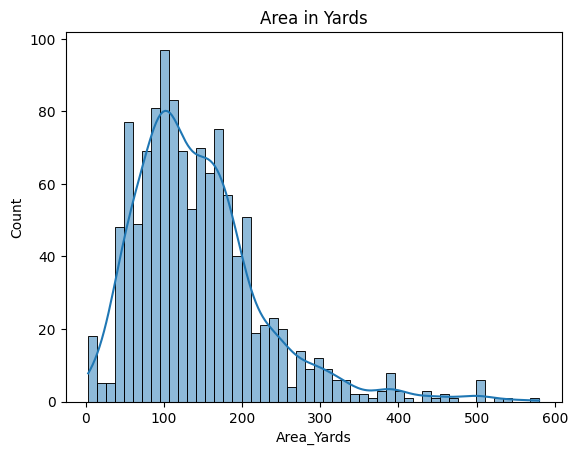

In [374]:
sns.histplot(x = df['Area_Yards'],  kde = True, bins = 50).set_title('Area in Yards')

Lookking at the distribution of Area if houses in delhi most of the houses have area between 80 - 200 sq. yards. This means that most of the houses in delhi are small houses and there are few house having area near 300 sq yards. Whereas thery are very few houses having area more than 400 sq yards. This representation helps us to know about availability of space in delhi.

### BHK

Text(0.5, 1.0, 'BHK')

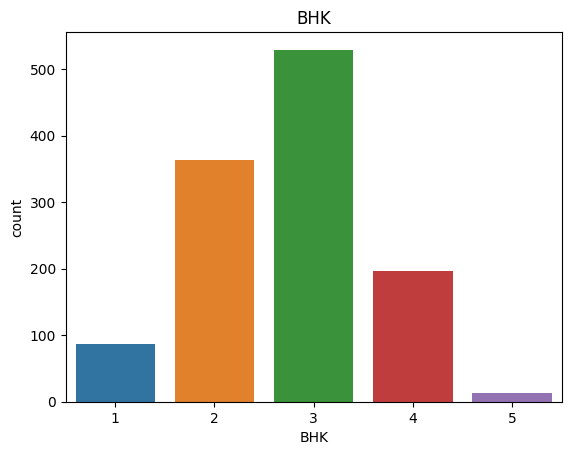

In [375]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')

BHK - Bedroom Hall Kitchen. From this graph we can get a little idea about the design of most of houses in delhi. Most of houses are 3 BHK followed by 2, 4, 1 and 5 BHK houses. Majority of the houses have area between 80-200 sq. yards. Houses with area near 200 yards can have maximum 3 bedrooms, for houses with area near 100 can have 2 bedrooms and 1 bedroom for houses with area less than 80 sq yards. Moreover whoses having area more than 300 are less in number so the count of 4BHK and 5BHK. Thus, there is a relation between the BHK and area of house, with this relation we can get a idea about the structure of houses.

### Bathroom Count

Text(0.5, 1.0, 'Bathroom')

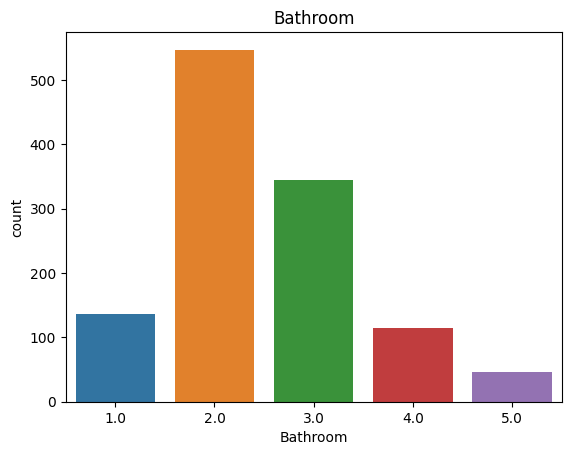

In [376]:
sns.countplot(x = 'Bathroom', data = df).set_title('Bathroom')

Majority of the houses have 2 bathrooms which, is quite obvious. However there some houses having 3 or more than 3 bathrooms, which is means these houses are quite big and spacious to have 3 or more bathrooms. Smaller houses usually have 1 bathroom.

### Furnishing

Text(0.5, 1.0, 'Furnishing')

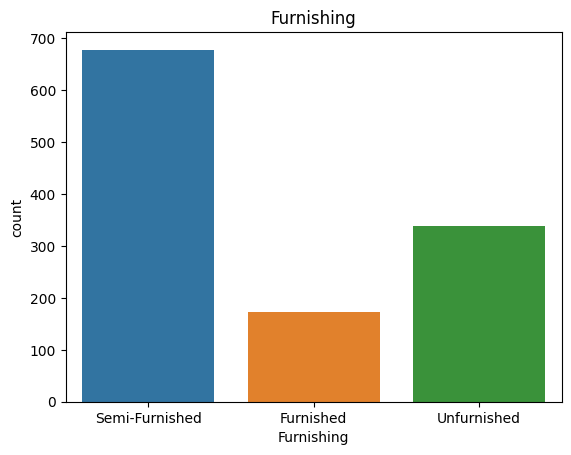

In [377]:
sns.countplot(x='Furnishing',data=df).set_title('Furnishing')

Delhi is very close captial of India, New Delhi and many people migrate from various regions of the country mostly for employment reasons to this region. As these people look for accomodations, the furnishing of the houses play a major role. People who are migrationg from huge distances cannot afford to move their furniture and other household items. Hence, they look for fully furnished houses. Similarly the people from neighbouring states might prefer semi-furnished houses, whereas Delhi locals who are moving to some other reason might prefer unfurnished houses. Hence, the furnishing of the house plays a major role in the price of the house. Hence, we have included this feature in our dataset

### Locality

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

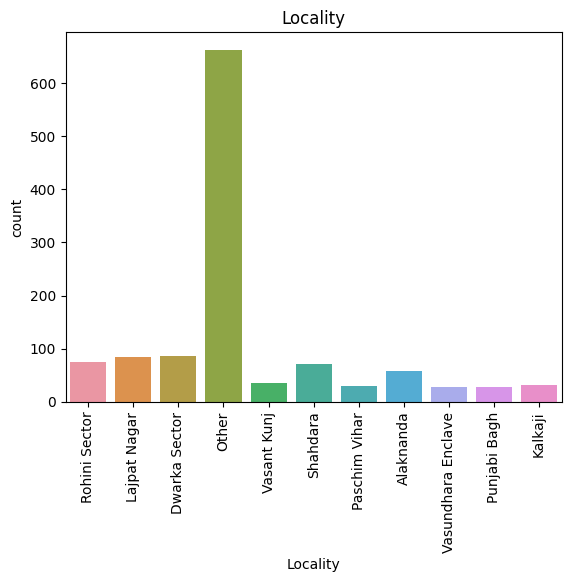

In [378]:
sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)

Since there are so many localities ans address in the dataset, I have group nearly half of them in the top ten localities (count wise), and the remaining localities are grouped as 'Others'. Upon visualizing the locality on the graph, we can se that after the 'Other' category, the Dwarka Sector has highest number of houses followed by Lajpat Naagr and Rohini Sector. From this info, I assume that these localities aare good to settle in Delhi. In addition to that localities such as Shahdara and Alaknanda are have significant number of houses as well. So, these localities are also good to settle in Delhi.

### Parking

Text(0.5, 1.0, 'Parking')

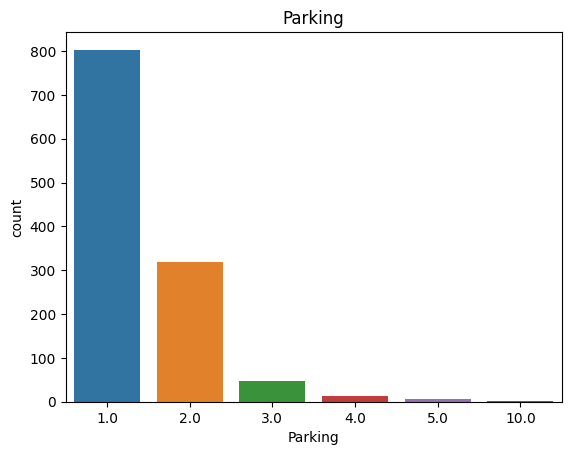

In [379]:
sns.countplot(x = 'Parking', data = df).set_title('Parking')

Majority of the houses in Delhi has one car parking which is quite common. Few of the houses have enough space for two car parking and very few houses have more than two car parking space. We can relate this graph to the graph with house area, where majority of the houses have area between 100 -200 sq. yards. So, it is quite obvious than these house will have one car parking space. The houses with area more than 200 sq. yards will have more than one car parking space.

### Status

Text(0.5, 1.0, 'Status of the Property')

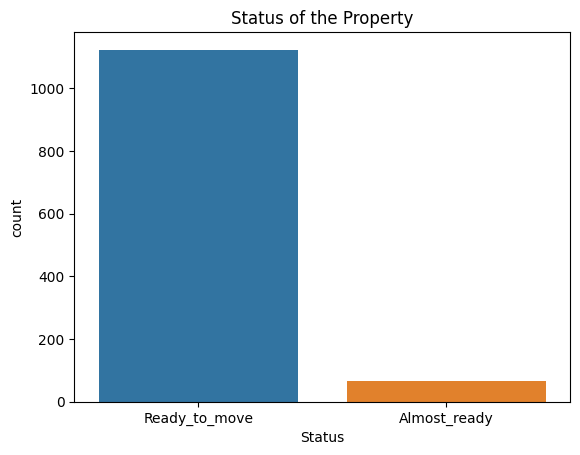

In [380]:
sns.countplot(x = 'Status', data = df).set_title('Status of the Property')

Most of the houses are ready to move and actively looking for buyers. Very few houses are still under construction and would be ready to move soon. 

### Transaction Type

Text(0.5, 1.0, 'Transaction Type')

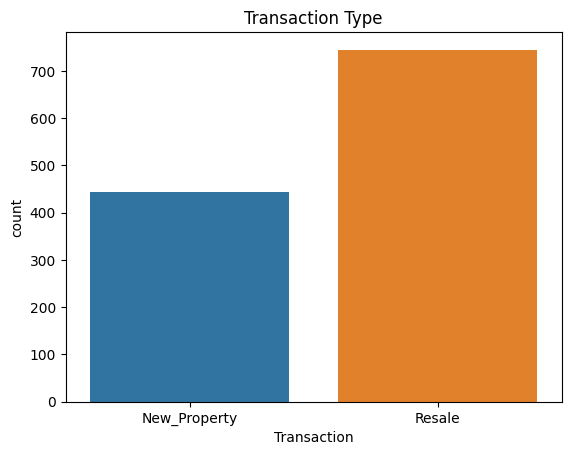

In [381]:
sns.countplot(x='Transaction', data=df).set_title('Transaction Type')

A huge number of houses are resale type, which means a lot of people are moving out of Delhi. This could be due to the high pollution levels or some other reason. This could be a good opportunity for people who are looking to buy a house in Delhi. Nearly 430 houses are new property houses which are built with only purpose to be commericially sold.

### House Type

Text(0.5, 1.0, 'Type of House')

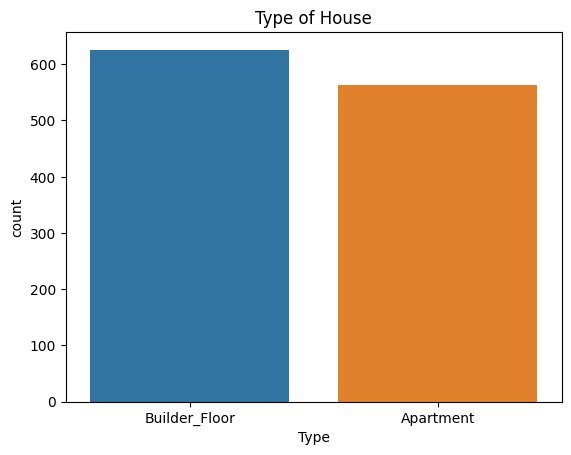

In [382]:
sns.countplot(x='Type',data=df).set_title('Type of House')

Most of the houses are builder floor which means people like to live in independent houses rather than apartments, due to the privacy and space they get in independent houses.

Till now, I have visualize the distribution of data across variables in the dataset. Now, I will be looking at the realtion between the target variable i.e Price and independent variables.

### Area and Price

<Axes: xlabel='Area_Yards', ylabel='Price'>

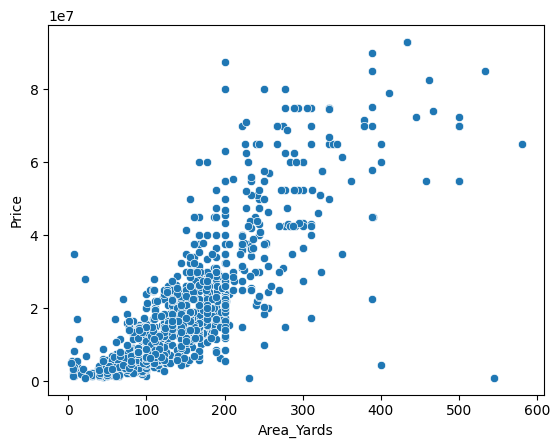

In [383]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = df)

The scatterplot graph has trend of increase in price with increase in area, which is obvious. However, there are some houses whose price is lower as compared to other with similar area, which means there are several other factors which affects price of the house.

### BHK and Price

Text(0.5, 1.0, 'BHK vs Price')

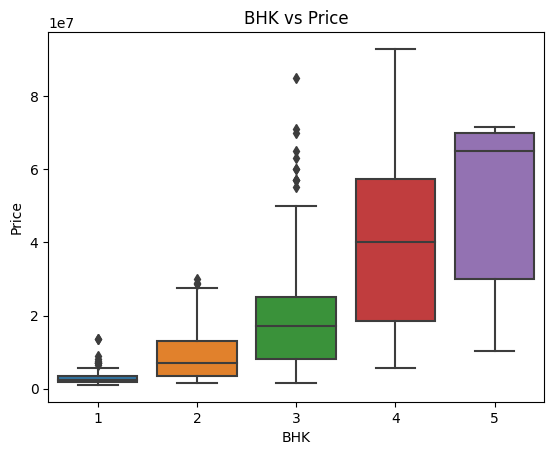

In [384]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')

From this boxplot, we get to know about the relation between the price of the house and the BHK count. We can see that the price of the house increases with the increase in the BHK count, which evident from the fact that 5 BHK houses have the highes median price i.e. nearly 7,00,00,000 INR followed by 4 BHK houses with median price of nearly 4,00,00,000 INR. Incomparison to that, 3BHK houses have median price near about 1 crore INR and 2BHK houses have median price of nearly 50,00,000 INR. The 1BHK houses have the lowest median price of nearly 30,00,000 INR.

### Bathroom count and Price

Text(0.5, 1.0, 'Bathroom vs Price')

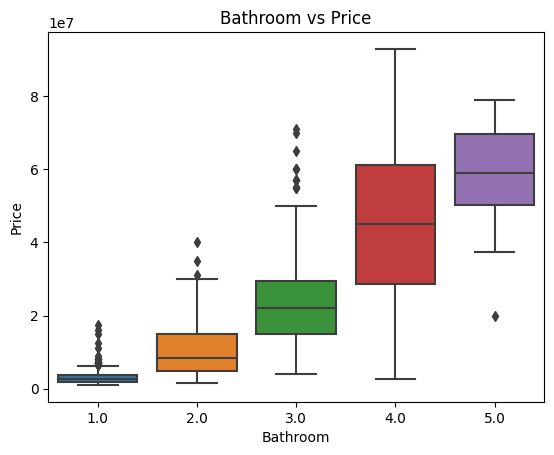

In [385]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')

The graph is similar to the previous graph for BHK and Price. Here the price of the house increases with increase in the number of bathrooms. Moreover the each bathroom count has similar house price as the previous graph for BHK and Price. Therefore, we can say that number of bathrooms and the BHK of the house are highly correlated.

### Parking and Price

Text(0.5, 1.0, 'Parking vs Price')

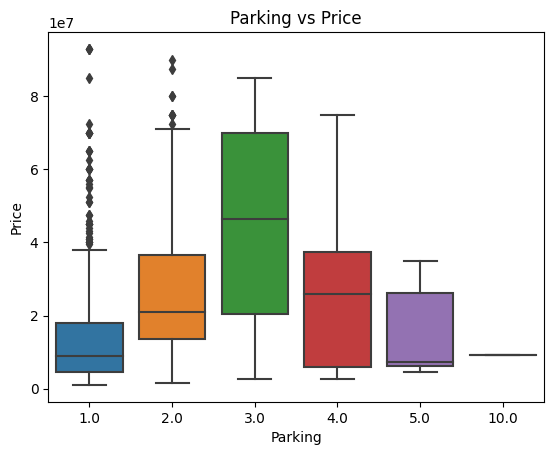

In [386]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

This boxplot graphs shows the relationship between the parking space and the price of the house. Houses with 3 parking spaces has highest median price which is 4,50,00,000, followed by 3 parking space, 2 parking space and 1 parking space. From this graph, we can assume that people usually look for the houses to have sufficient parking space, which means they don't want more than enough space for parking which evident throught the lower median price of houses with 4 parking space or more.

### Locality and Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

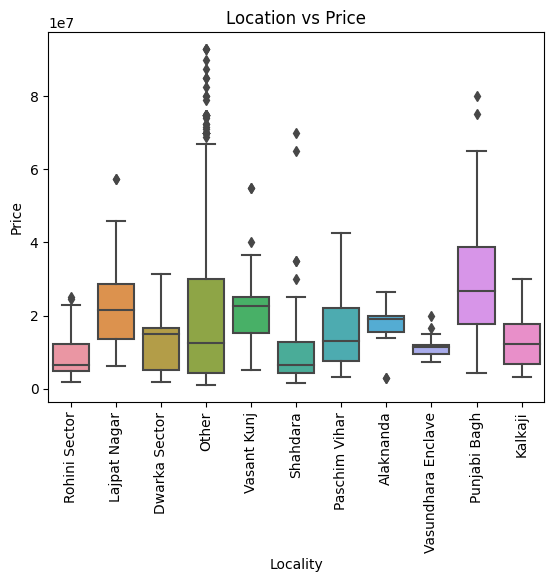

In [387]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)

From this graph, we can get idea about the localities along with the house price. Punjabi Bagh locality has the highest median price of nearly 2,50,00,000 INR, which means this is a posh locality. Punjabi Bagh is followed by Lagpat Nagar and Vasant Kunj. These two localities can be included in the posh locality. The localities with lowest median prices includes - Rohini Sector, Vasundhara Enclave and Shahdara. Some of the mediocre localities are - Dwarka Sector,  Pashchim Vihar, Kalkaji, and the rest of the localities are average.

### Furnishing and Price

Text(0.5, 1.0, 'Furnishing vs Price')

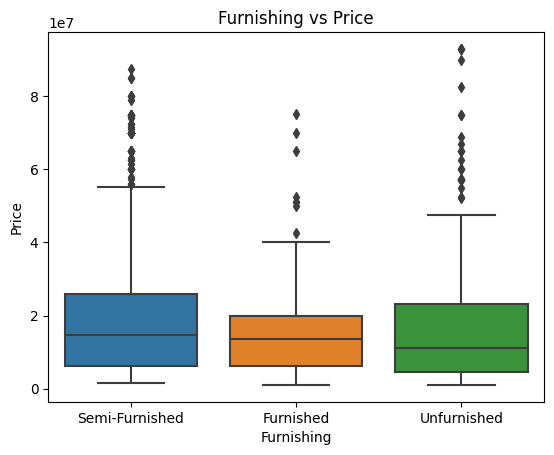

In [388]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = df).set_title('Furnishing vs Price')

There is very little difference in the median house price based on the furnishing status. Interestingly, the furnished houses have a lower median price than the semi-furnished houses. The unfurnished houses have the lowest median price.

### Status and Price

Text(0.5, 1.0, 'Price vs Status')

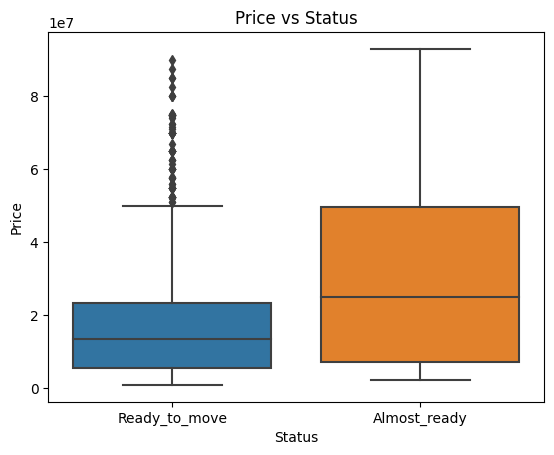

In [389]:
sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Price vs Status')

Surprisingly the houses that are still under construction have higher median price than those which are ready to move in. This might be because the houses that are still under construction allow the buyers to make changes to interior/exterior. 

### Transaction Type and Price

Text(0.5, 1.0, 'Transaction vs Price')

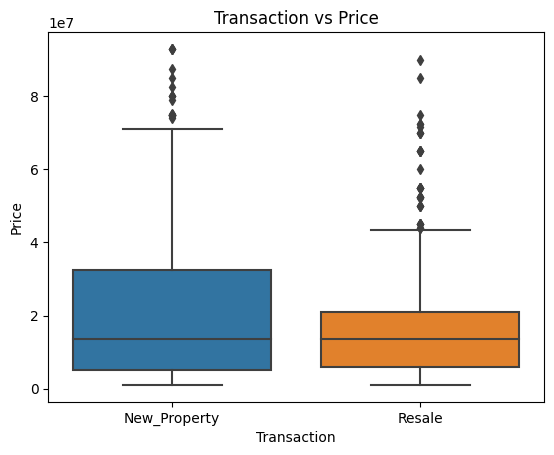

In [390]:
sns.boxplot(x = 'Transaction', y = 'Price', data = df).set_title('Transaction vs Price')

As expected the new properties have higher price than old ones/ resale ones. The new properties attracts more buyers to make features including reliability, designs. Whereas the resale one sometimes poses doubts for the buyers. 

### Property Type and Price

Text(0.5, 1.0, 'Price vs Type')

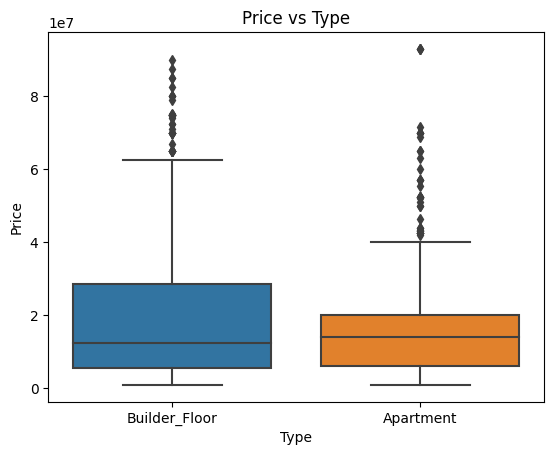

In [391]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Price vs Type')

Both the Builder Floor and Apartment type houses have nealry same median price with Apartment type houses having slightly higher median price. However, the builder floor type houses are more in number which means people are more interested in buying builder floor type houses.

## Data Preprocessing 2

#### Label encoding the categorical variables

In [392]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


#### Normalizing the continuous features

In [393]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']] = MinMaxScaler().fit_transform(df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']])

In [394]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,0.148690,3,2.0,1,7,1.0,0.059783,1,0,1,0.097173,0.148690
1,0.139060,2,2.0,1,7,1.0,0.043478,1,0,0,0.076565,0.139060
2,0.177581,2,2.0,0,7,1.0,0.157609,1,1,0,0.076565,0.177581
3,0.110169,2,2.0,1,7,1.0,0.034783,1,1,1,0.076565,0.110169
4,0.119800,2,2.0,1,7,1.0,0.056522,1,0,1,0.076565,0.119800


## Coorelation Matrix Heatmap

<Axes: >

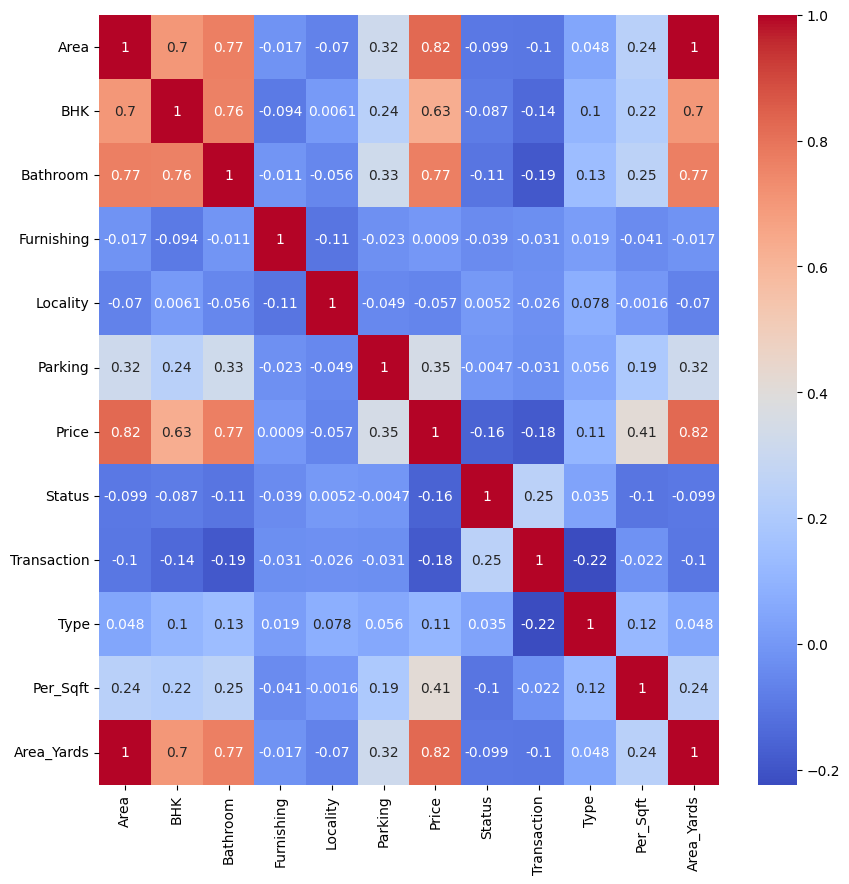

In [395]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In this coorelation matrix heatmap, we can see that the price of the house has high positive coorelation with land area, BHK, bathroom count, which proves are previous obersevation about their relation. 

## Train Test Split

In [396]:
# Dropping Per_Sqft column
df.drop(['Per_Sqft'],axis=1,inplace=True)

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

## Price Prediction
I will be using the following models:
- Decision Tree Regressor
- Random Forest Regressor

### Decision Tree Regressor

In [398]:
from sklearn.tree import DecisionTreeRegressor

#creating Decision Tree Regressor object
dtr = DecisionTreeRegressor()

#### Hypertuning the model with GridSearchCV

In [399]:
from sklearn.model_selection import GridSearchCV

# Defining parameters
parameters  = {'max_depth':[2,4,6,8],
               'min_samples_split':[2,4,6,8],
               'min_samples_leaf':[1,2,3,4],
               'max_features':['auto','sqrt','log2'],
               'random_state':[0,42]}

# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

Best parameters:  {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'random_state': 42}


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [400]:
dtr = DecisionTreeRegressor( max_depth=6, max_features='auto', min_samples_leaf = 1, min_samples_split = 8, random_state=42)
dtr

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_split=8,
                      random_state=42)

In [401]:
# Training the model
dtr.fit(X_train, y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_split=8,
                      random_state=42)

In [402]:
# Training Accuracy
dtr.score(X_train, y_train)

0.8545210312800097

In [403]:
# Predicting the house price
d_pred = dtr.predict(X_test)

## Evaluting Decision Tree Regressor Model

In [404]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.190217,0.033967
1,0.597826,0.561394
2,0.076087,0.102298
3,0.009239,0.018041
4,0.028261,0.018041
5,0.641304,0.584239
6,0.217391,0.214022
7,0.157609,0.171645
8,0.695652,0.472826
9,0.039348,0.067916


C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\3339549931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\3339549931.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Predicted', ylabel='Density'>

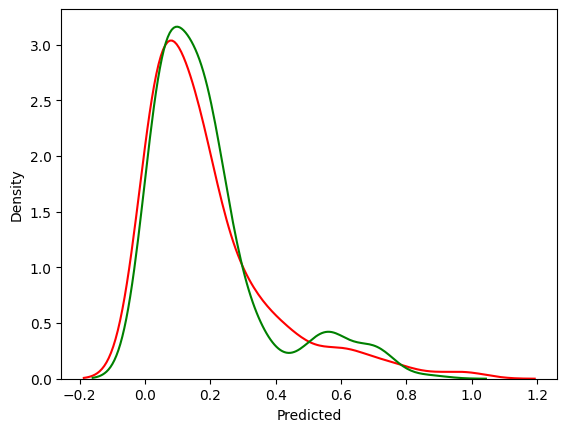

In [405]:
ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dft['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

The red shows the distribution count for actual values and the green shows the distribution count for predicted values. The predicted value line tries to follow the actual value line as closely as possible. The closer the two lines are, the better the model is at predicting the house prices.

In [407]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.829160558769424
Mean Squared Error:  0.006271711839596123
Mean Absolute Error:  0.05365863521857312
Root Mean Squared Error:  0.07919414018471393


### Random Forest Regressor

In [409]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Object
rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [410]:
# Training the model
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [411]:
# Training Accuracy
rfr.score(X_train, y_train)

0.962961816363294

In [412]:
# Predicting the house price
r_pred = rfr.predict(X_test)

## Evaluating the Random Forest Regressor Model

In [413]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.190217,0.145777
1,0.597826,0.499008
2,0.076087,0.077978
3,0.009239,0.026630
4,0.028261,0.015136
5,0.641304,0.568359
6,0.217391,0.335087
7,0.157609,0.181323
8,0.695652,0.284130
9,0.039348,0.039365


C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\570199092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color = 'r', label = 'Actual Price', hist = False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\570199092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

<Axes: xlabel='Predicted', ylabel='Density'>

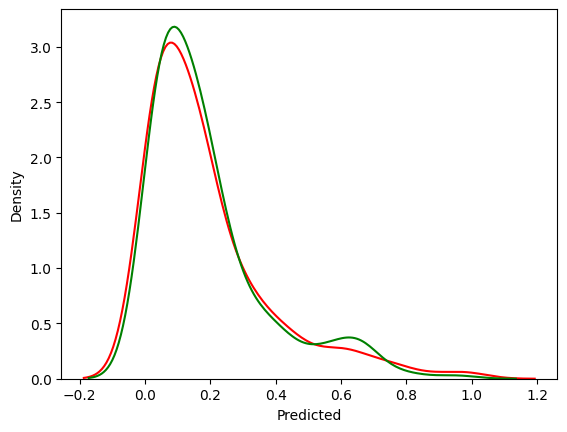

In [414]:
ax = sns.distplot(dfr['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dfr['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

The red shows the distribution count for actual values and the green shows the distribution count for predicted values. The predicted value line tries to follow the actual value line as closely as possible. The closer the two lines are, the better the model is at predicting the house prices.

In [417]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.8498051402966182
Mean Squared Error:  0.005513825572496586
Mean Absolute Error:  0.04537652809312131
Root Mean Squared Error:  0.07425513835753446


## Conclusion

From the exploratory data analysis, we can conclude that the following features are important for predicting the price of a house in Delhi:

1. **Area**
2. **BHK**
3. **Locality**

From the EDA it was also found that, most of the houses in delhi are small having area between 100 to 200 sq. yards having 2-3 BHK. The price of the houses in localities such as Punjabi Bagh, Lajpat nagar and Vasant Kunj are high as compared to other localities, which means these are posh areas of Delhi. Most of the people prefer a new builder floor property despite the aprtments cost the same because people want to design their house according to their own needs and requirements and want more privacy and independency.

Coming to the machine learning models, I have used regression models - Decision Tree Regressor and Random Forest Regressor. The Random Forest regressor performed better than the Decision Tree Regressor with an accuracy of 84.98%